In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sinfo=pd.read_csv("subject-info.csv")

In [4]:
tm=pd.read_csv("test_measure.csv")

In [5]:
sinfo

,ID,age,Weight,Height,P_vt1,P_vt2,sport
0,1,15,53.7,161,50,140,fencing
1,2,15,56.2,162,80,127,fencing
2,3,16,89.9,191,155,300,fencing
3,4,16,76.5,180,215,275,fencing
4,5,17,76.4,186,110,172,fencing
5,6,17,65.6,169,131,186,fencing
6,7,15,49.8,165,65,108,fencing
7,8,15,51.2,165,80,133,fencing
8,9,14,57.1,176,50,125,fencing
9,10,14,58.8,177,101,162,fencing


In [6]:
tm

,ID,time,RR,VO2,power
0,1,-130.840,672.0,0.302008,0
1,1,-130.168,672.0,0.302008,0
2,1,-129.536,632.0,0.301336,0
3,1,-128.824,712.0,0.301336,0
4,1,-127.948,876.0,0.301336,0
...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0
52058,18,947.816,528.0,0.507071,0
52059,18,948.344,528.0,0.507071,0
52060,18,948.884,540.0,0.507071,0


In [7]:
tm.T

,0,1,2,3,4,5,6,7,8,9,...,52052,52053,52054,52055,52056,52057,52058,52059,52060,52061
ID,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
time,-130.840000,-130.168000,-129.536000,-128.824000,-127.948000,-127.232000,-126.460000,-125.608000,-124.912000,-124.140000,...,944.644000,945.160000,945.692000,946.224000,946.752000,947.288000,947.816000,948.344000,948.884000,949.424000
RR,672.000000,672.000000,632.000000,712.000000,876.000000,716.000000,772.000000,852.000000,696.000000,772.000000,...,528.000000,516.000000,532.000000,532.000000,528.000000,536.000000,528.000000,528.000000,540.000000,540.000000
VO2,0.302008,0.302008,0.301336,0.301336,0.301336,0.371173,0.371173,0.371173,0.410091,0.410091,...,0.431833,0.474922,0.474922,0.474922,0.474922,0.507071,0.507071,0.507071,0.507071,0.507071
power,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
tm.size

260310

In [9]:
tm.shape

(52062, 5)

In [10]:
sinfo.shape

(18, 7)

In [11]:
missingvalues_percentage =tm.isna().sum().sort_values(ascending= False)/len(tm)
missingvalues_percentage

RR       0.022051
ID       0.000000
time     0.000000
VO2      0.000000
power    0.000000
dtype: float64

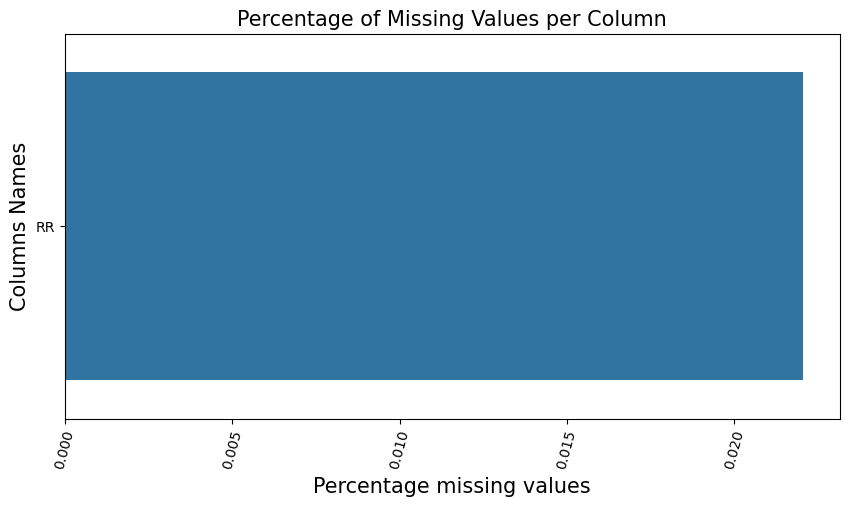

In [13]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of Missing Values per Column",fontsize=15)

b=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
b.set_ylabel("Columns Names",fontsize= 15)
b.set_xlabel("Percentage missing values",fontsize= 15)
plt.show()